In [3]:
%matplotlib inline

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.regression import LabeledPoint as DataPoint
from pyspark.mllib.classification import LogisticRegressionWithSGD as LogisticRegression
import sys
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TEST_DATA = "../data/preprocessed_train_5M.csv"
iteration = 100

def ParseData(row):
    data = [float(feature) for feature in row.split(",")]
    return DataPoint(data[0], data[1:20])
    
data = sc.textFile(TEST_DATA).map(ParseData)
train, test = data.randomSplit([0.8, 0.2], seed = 11L)
train.cache()
#print train.map(lambda x: x.features).mean()
#print train.map(lambda x: x.features).stdev()
LR = LogisticRegression.train(train, iteration)
predictions = LR.predict(test.map(lambda x: x.features))
labelsAndPredictions = test.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(test.count())
print testErr

0.328924913398


In [4]:
LR.clearThreshold()
scores = LR.predict(test.map(lambda x: x.features))
labelsAndScores = test.map(lambda lp: lp.label).zip(scores)
labelsAndScores_list = labelsAndScores.collect()


In [5]:
labelsAndScores_list = np.array(labelsAndScores_list)

In [6]:
print labelsAndScores_list.shape

(11811, 2)


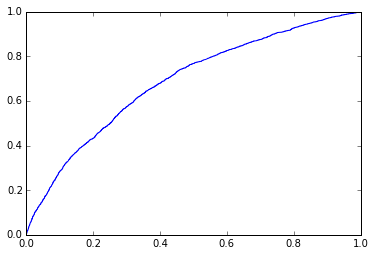

In [18]:
tpr, fpr, th = roc_curve(labelsAndScores_list[:,0].flatten(), labelsAndScores_list[:,1].flatten())
plt.figure(1)
plt.plot(tpr, fpr)

In [10]:
print labelsAndScores_list[:,0].flatten()

[ 1.  0.  0. ...,  0.  1.  0.]
